In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Question 2 Create a single visualization that compares APRs of men’s and women’s sports. Comment on the major finding(s).

**Answer:** As the graph shows below, women's median APR are generally higher than men's.

In [36]:
url = "https://ncaaorg.s3.amazonaws.com/research/academics/2020RES_APR2019PubDataShare.csv"
df = pd.read_csv(url)
df.head()

,DATA_TAB_GENERALINFO,SCL_UNITID,SCL_NAME,SPORT_CODE,SPORT_NAME,ACADEMIC_YEAR,SCL_DIV_19,SCL_SUB_19,D1_FB_CONF_19,CONFNAME_19,...,PUB_AWARD_15,PUB_AWARD_14,PUB_AWARD_13,PUB_AWARD_12,PUB_AWARD_11,PUB_AWARD_10,PUB_AWARD_09,PUB_AWARD_08,PUB_AWARD_07,PUB_AWARD_06
0,NaN,100654,Alabama A&M University,1,Baseball,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,100654,Alabama A&M University,2,Men's Basketball,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,100654,Alabama A&M University,4,Football,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,100654,Alabama A&M University,6,Men's Golf,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,100654,Alabama A&M University,13,Men's Tennis,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [39]:
#extract men and women, set the info into a new column named "gender"
mask = df['SPORT_NAME'].str.contains('men', case=False)
df_gender = df[mask]
df_gender['gender'] = df_gender['SPORT_NAME'].str.split().str.get(0)
df_gender

<ipython-input-39-cbafc3ff9a06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender['gender'] = df_gender['SPORT_NAME'].str.split().str.get(0)


,DATA_TAB_GENERALINFO,SCL_UNITID,SCL_NAME,SPORT_CODE,SPORT_NAME,ACADEMIC_YEAR,SCL_DIV_19,SCL_SUB_19,D1_FB_CONF_19,CONFNAME_19,...,PUB_AWARD_14,PUB_AWARD_13,PUB_AWARD_12,PUB_AWARD_11,PUB_AWARD_10,PUB_AWARD_09,PUB_AWARD_08,PUB_AWARD_07,PUB_AWARD_06,gender
1,NaN,100654,Alabama A&M University,2,Men's Basketball,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men's
3,NaN,100654,Alabama A&M University,6,Men's Golf,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men's
4,NaN,100654,Alabama A&M University,13,Men's Tennis,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,Men's
5,NaN,100654,Alabama A&M University,14,"Men's Track, Cross Country",2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men's
6,NaN,100654,Alabama A&M University,18,Women's Basketball,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,Women's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6012,NaN,486840,Kennesaw State University,28,Women's Softball,2019,1,2,Big South Conference,ASUN Conference,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Women's
6013,NaN,486840,Kennesaw State University,30,Women's Soccer,2019,1,2,Big South Conference,ASUN Conference,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Women's
6014,NaN,486840,Kennesaw State University,33,Women's Tennis,2019,1,2,Big South Conference,ASUN Conference,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Women's
6015,NaN,486840,Kennesaw State University,34,"Women's Track, Cross Country",2019,1,2,Big South Conference,ASUN Conference,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Women's


In [40]:
#Turn this into long form data, gender column as id, APR as value
df_g = pd.melt(df_gender, id_vars="gender",value_vars="MULTIYR_APR_RATE_1000_OFFICIAL",value_name="APR_value")
df_drop = df_g.drop("variable", axis=1)
df_drop


,gender,APR_value
0,Men's,908.0
1,Men's,946.0
2,Men's,1000.0
3,Men's,866.0
4,Women's,934.0
...,...,...
5438,Women's,988.0
5439,Women's,982.0
5440,Women's,1000.0
5441,Women's,986.0


[Text(0.5, 1.0, "compare men's and women's APR")]

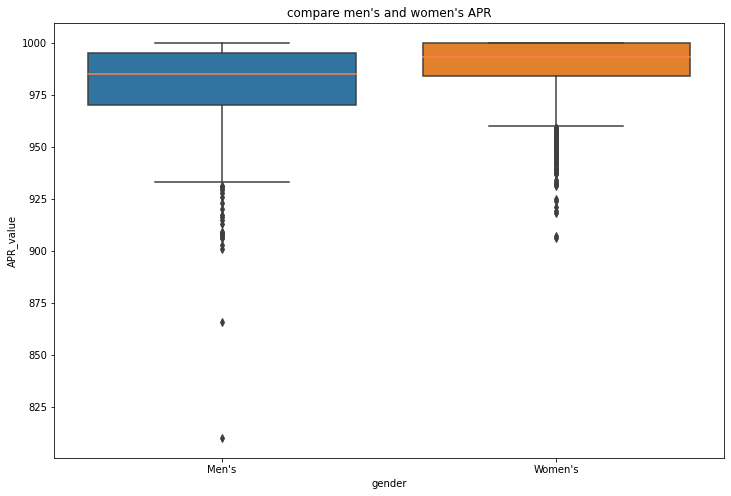

In [41]:
# Set the plot size
plt.figure(figsize=(12, 8))
apr = sns.boxplot(data=df_drop, x= "gender", y="APR_value",medianprops={"color": "coral"}).set(title="compare men's and women's APR")
apr